**Nama : Muammar Ahlan Abimanyu**  
**NIM : H071191032**  
  
  
Dataset yang dipakai pada implementasi kode Apriori dibawah ini dapat diunduh https://www.kaggle.com/ahmtcnbs/datasets-for-appiori

In [ ]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
%matplotlib inline

In [ ]:
# load dataset
data_frame = pd.read_csv("basket_analysis.csv")
data_frame.head()
data_frame

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [ ]:
# mengecek apakah ada data yang kosong
data_frame.isna().sum().sum()

0

In [ ]:
# filter data yang melakukan transaksi lebih dari sama dengan dua item
data_frame_filter = data_frame[(data_frame > 0).sum(axis = 1) >= 2]
data_frame_filter = data_frame_filter.iloc[:,1:]
data_frame_filter

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


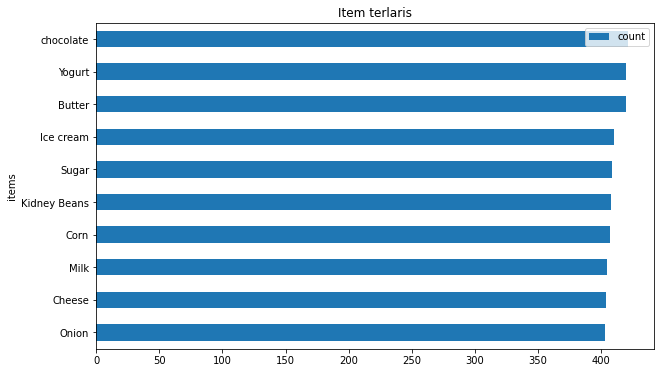

In [ ]:
# visualisasi transaksi berdasarkan item yang paling banyak terjual
count = data_frame_filter.loc[:,:].sum()
pop_item = count.sort_values(0, ascending=False).head(10).to_frame().reset_index().rename(columns={"index" : "items", 0 : "count"})

plt.rcParams['figure.figsize'] = (10, 6)
ax = pop_item.plot.barh(x="items", y="count")
plt.title("Item terlaris")
plt.gca().invert_yaxis()

In [ ]:
# buat model apriori
freqeunt_items = apriori(data_frame_filter, min_support=0.05, use_colnames=True)

In [ ]:
# membuat aturan asosiasi dengan min lift ratio-nya adalah 1
rules = association_rules(freqeunt_items, metric="lift", min_threshold=1)

rules = rules.sort_values(["confidence", "lift"], ascending = [False, False])
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6596,"(Unicorn, Milk, Dill)",(chocolate),0.091091,0.421421,0.062062,0.681319,1.616716,0.023674,1.815540
5980,"(Cheese, Sugar, Unicorn)",(Kidney Beans),0.081081,0.408408,0.054054,0.666667,1.632353,0.020940,1.774775
5812,"(Cheese, Ice cream, Yogurt)",(Kidney Beans),0.087087,0.408408,0.057057,0.655172,1.604209,0.021490,1.715616
5672,"(Cheese, Milk, Dill)",(chocolate),0.084084,0.421421,0.055055,0.654762,1.553699,0.019620,1.675883
3908,"(Apple, Corn, Onion)",(Sugar),0.083083,0.409409,0.054054,0.650602,1.589124,0.020039,1.690311
